In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNetCV,ElasticNet
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
df=pd.read_csv('Admission_Prediction.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
new_data= df.copy()
#axis=0:rows, axis=1: columns
data=new_data.drop(['Serial No.'],axis=1)
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
profile = ProfileReport(data, title="Your Report Title")

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Handling missing values 

In [11]:
data.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


This is not the best way to fill missing value we acn use some imputers.

In [12]:
data['GRE Score'] = data['GRE Score'].fillna(df['GRE Score'].mean())

In [13]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [14]:
data['University Rating'] = data['University Rating'].fillna(df['University Rating'].mean())

In [15]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Defining Independent and Dependent variables

In [20]:
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

### Scaling the data 

In [22]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [33]:
scaler =StandardScaler()

In [39]:
x_scaled= scaler.fit_transform(x)
print(x_scaled)
print(x_scaled.shape)

[[ 1.84274116e+00  1.78854223e+00  7.78905651e-01 ...  1.09894429e+00
   1.77680627e+00  8.86405260e-01]
 [ 6.70814288e-01 -3.10581135e-02  7.78905651e-01 ...  1.09894429e+00
   4.85859428e-01  8.86405260e-01]
 [ 5.12433309e-15 -5.27312752e-01 -1.07876604e-01 ...  1.73062093e-02
  -9.54042814e-01  8.86405260e-01]
 ...
 [ 1.21170361e+00  2.11937866e+00  1.66568791e+00 ...  1.63976333e+00
   1.62785086e+00  8.86405260e-01]
 [-4.10964364e-01 -6.92730965e-01  7.78905651e-01 ...  1.63976333e+00
  -2.42366993e-01 -1.12815215e+00]
 [ 9.41258951e-01  9.61451165e-01  7.78905651e-01 ...  1.09894429e+00
   7.67219636e-01 -1.12815215e+00]]
(500, 7)


### checking multicollinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
variables=data.drop(columns=['Chance of Admit'])
# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=365)  

In [50]:
print(x_train.shape)
print(x_test.shape)

(375, 7)
(125, 7)


In [51]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
reg.coef_

array([0.01592785, 0.01470124, 0.00550268, 0.00265584, 0.0163445 ,
       0.0744603 , 0.01654064])

In [55]:
reg.intercept_

0.72235066794126

In [58]:
y_hat=reg.predict(x_train)

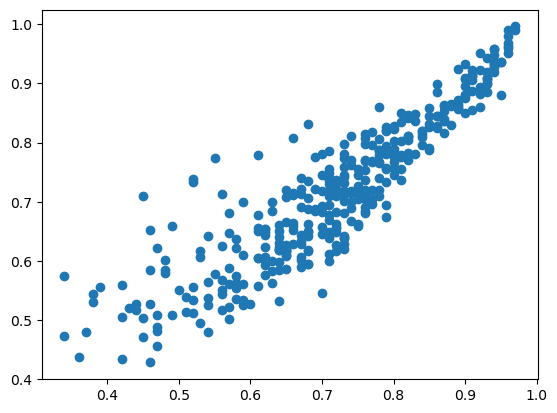

In [67]:
%matplotlib inline
plt.scatter(y_train,y_hat)
plt.plot()
plt.show()

# Rsquared

In [78]:
reg.score(x_train,y_train)

0.8184634493697541

In [105]:
reg.score(x_test,y_test)

0.8223808592468428

In [106]:
def adj_rsq(x,y):
    r2=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(n-1)*(1-r2)/(n-p-1)
    return adjusted_r2

adj_rsq(x_test,y_test)

0.811754073047936

In [107]:
adj_rsq(x_train,y_train)

0.8150008993577331

# TESTING

In [79]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [81]:
reg.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])

array([8.66737868])

In [85]:
a=scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])
a

C:\Users\prash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [93]:
reg.predict(a)

array([0.95022701])

In [96]:
a1=scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])
a1

C:\Users\prash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.67081429, -0.03105811,  0.77890565,  0.63231549,  1.09894429,
         0.48585943,  0.88640526]])

In [97]:
reg.predict(a1)

array([0.80734475])

# Creating a model and storing it in

Here our model name is 'reg'

In [69]:
import pickle
pickle.dump(reg,open('addimission_prediction_model.pickle','wb')) #creating a physical model 

In [75]:
!dir

 Volume in drive C is OS
 Volume Serial Number is A04F-F420

 Directory of C:\backup\Data Science\udemy course\python for data science\practice\Regression\Project_addimission_prediction_lasso_ridge_elasticNet

30-05-2024  17:39    <DIR>          .
30-05-2024  15:32    <DIR>          ..
30-05-2024  15:35    <DIR>          .ipynb_checkpoints
30-05-2024  17:38               515 addimission_prediction_model.pickle
30-05-2024  15:34            16,085 Admission_Prediction.csv
30-05-2024  17:39            87,810 Untitled.ipynb
               3 File(s)        104,410 bytes
               3 Dir(s)  824,892,645,376 bytes free


In [99]:
model = pickle.load(open('addimission_prediction_model.pickle','rb'))

In [103]:
model.predict(a)

array([0.95022701])

In [104]:
model.predict(a1)

array([0.80734475])

# Lasso model

In [123]:
lassocv=LassoCV(cv=5,max_iter=20000000)
lassocv.fit(x_train,y_train)

LassoCV(cv=5, max_iter=20000000)

In [124]:
lassocv.alpha_

0.0006590259302401132

In [125]:
lasso= Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0006590259302401132)

In [126]:
lasso.score(x_train,y_train)

0.8184275648781498

# Ridge model

In [130]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.79679356, 3.39641158, 4.23986772, 4.65697488, 6.13855683,
       1.87241744, 1.91401201, 3.64042414, 2.8828467 , 8.4696101 ,
       6.6600583 , 0.56115222, 5.34307875, 3.10429368, 4.92349611,
       0.00925158, 0.43982068, 5.16553089, 8.70126003, 0.91396783,
       6.50931451, 6.00731772, 6.07403252, 8.669233  , 5.33898661,
       5.96978842, 0.15104347, 7.34647004, 8.52449737, 5.35767484,
       4.63005536, 1.91629366, 5.16983573, 1.20798136, 4.96854168,
       0.1220241 , 1.59065562, 3.12491606, 2.95008155, 8.5696748 ,
       2.57109062, 7.0389451 , 7.26928575, 6.49338394, 8.11550681,
       3.29208379, 3.72253546, 7.06084697, 7.21393365, 6.05111842]),
        cv=10)

In [132]:
ridgecv.alpha_

8.70126002715637

In [133]:
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=8.70126002715637)

In [134]:
ridge.score(x_train,y_train)

0.8180762478353953

# Elastic Net 

In [136]:
elasticcv=ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [137]:
elasticcv.alpha_

0.0007034046350514874

In [138]:
elasticcv.l1_ratio_

0.5

In [139]:
elastic=ElasticNet(alpha=elasticcv.alpha_,l1_ratio=elasticcv.l1_ratio_)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.0007034046350514874)

In [140]:
elastic.score(x_train,y_train)

0.8184529828621426

so we can conclude that every model we use is giving the same kind of result so we can go with normal ols model.
